<a href="https://colab.research.google.com/github/Prahalpm/Airbnb_Booking_Analysis_Capstone_Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?id=1rJ9s645kH43n2MkHGMOAz8XAkT69t5wV)




## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
1. What can we learn about different hosts and areas?<br>
    * 1.1 Top 10 most listed Hosts<br>
    * 1.2 Proportion of Hosts listed in all neighbourhood group on the basis of Host_Id.<br>
    * 1.3 Count of room type on the basis of Neighbourhood group.<br>
2. What can we learn from predictions? (Ex: locations, prices, reviews, etc.)<br>
    * 2.1 Which Neighbourhood group is the most costly?<br>
    * 2.2 Show the top 5 neighbourhoods that have the highest number of properties.<br>
    * 2.3 Neighbourhood group with the most no of reviews recorded.<br>
3. How analysis of this data can help in listing new business and setting a price for future growth of a Property <br>
4. Which hosts are the busiest and why?<br>

5. Is there any noticeable difference of traffic among different areas and what could be the reason for it?<br>
6. Price band, Maximum and Minimum values of each Neighbourhood group.<br>
7. Price distribution with respect to neighbourhood group<br>
8. Which are the most popular and most occupied room type on basis of its availability



# **Loading Dataset**

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
%cd "/content/drive/My Drive/Airbnb Capstone Project"

/content/drive/My Drive/Airbnb Capstone Project


In [88]:
!ls

Airbnb_Bookings_Analysis_Capstone_Project.ipynb  Airbnb.csv  airbnb_image.gif


# **Importing necessary libraries**

In [51]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


# **Checking Dataset**

In [52]:
#checking the first 10 Rows
df = pd.read_csv('Airbnb.csv') 
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [53]:
#checking the last 5 Rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# **Checking Variables and Unique values**

In [54]:
#printing total rows and Columns
df.shape

(48895, 16)

In [55]:
#Printing informaion about Dataframe  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [56]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [57]:
#Gathering Numerical variables
numeric_variables = df._get_numeric_data()

In [58]:
#printing 5 uniques values for each numerical variable
for i in numeric_variables:
  print(f'{i} : {numeric_variables[i].unique()[:5]}')

id : [2539 2595 3647 3831 5022]
host_id : [2787 2845 4632 4869 7192]
latitude : [40.64749 40.75362 40.80902 40.68514 40.79851]
longitude : [-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
price : [149 225 150  89  80]
minimum_nights : [ 1  3 10 45  2]
number_of_reviews : [  9  45   0 270  74]
reviews_per_month : [0.21 0.38  nan 4.64 0.1 ]
calculated_host_listings_count : [6 2 1 4 3]
availability_365 : [365 355 194   0 129]


# **Data cleaning**
Dropping Uncessary columns for data simplification <br>
Handling Missing Values <br>
Replacing Null Values with 0

In [59]:
#As we have show above that data contains 4 columns with missing values.

df.drop(['id','name','last_review'], axis=1, inplace=True)

We have dropped 3 columns such as id, name, last_review and not dropping Host_name to get relation between host_id and Host_names in future.

In [60]:
#checking columns have been dropped or not
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


We can see that we have dropped uncessary columns

In [61]:
#Getting count of missing values
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We can see reviews_per_month have high number of missing values and host_name also have missing values but it is very low count

In [62]:
#Replacing null values of 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

df.reviews_per_month.isnull().sum()

0

We have replaced the missing values of reviews_per_month by 0 as it have high numer of missing values and we can not drop these rows

In [63]:
df.dropna(how='any',inplace=True)

We have dropped the rows with null values as there are very few missing values.

In [64]:
#Checking if there are other missing values 
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [65]:
df.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [66]:
#checking the statistics features
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887400e+04,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000,48874.000000
mean,6.762157e+07,40.728946,-73.952172,152.738634,7.031387,23.266358,1.090785,7.146458,112.793755
std,7.861415e+07,0.054529,0.046156,240.199728,20.514423,44.544330,1.597119,32.959378,131.619934
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.823258e+06,40.690100,-73.983078,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723065,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [67]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# **Handling outliers**

In [68]:
#Printing first and third quartile
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
Q1, Q3

(69.0, 175.0)

We have obtained the first Quartile 
(25th percentile) and third quartile (75th percentile).

In [69]:
#Calculating Inter Quartile Range
IQR = Q3 - Q1
IQR

106.0

We have obtained the IQR value which is 106

In [70]:
#calculating Lower bound and Upper bound
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-90.0, 334.0)

Lower Bound : -90.0 <br>
Upper Bound : 334.0

In [71]:
#printing the Outliers below lower bound and above upper bound
df[(df.price<lower_limit)|(df.price>upper_limit)]

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0.00,1,364
48833,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0.00,1,64
48839,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0.00,1,23
48842,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0.00,1,9


In [72]:
#Storing the data between the range of lower limit to upper limit into new dataframe
df_no_outlier = df[(df.price>lower_limit)&(df.price<upper_limit)]
df_no_outlier.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


We have removed the outliers and stored the useful data into new dataframe (df_no_outlier), and we will use only new dataframe for further analysis.

# **Correlation Heatmap**

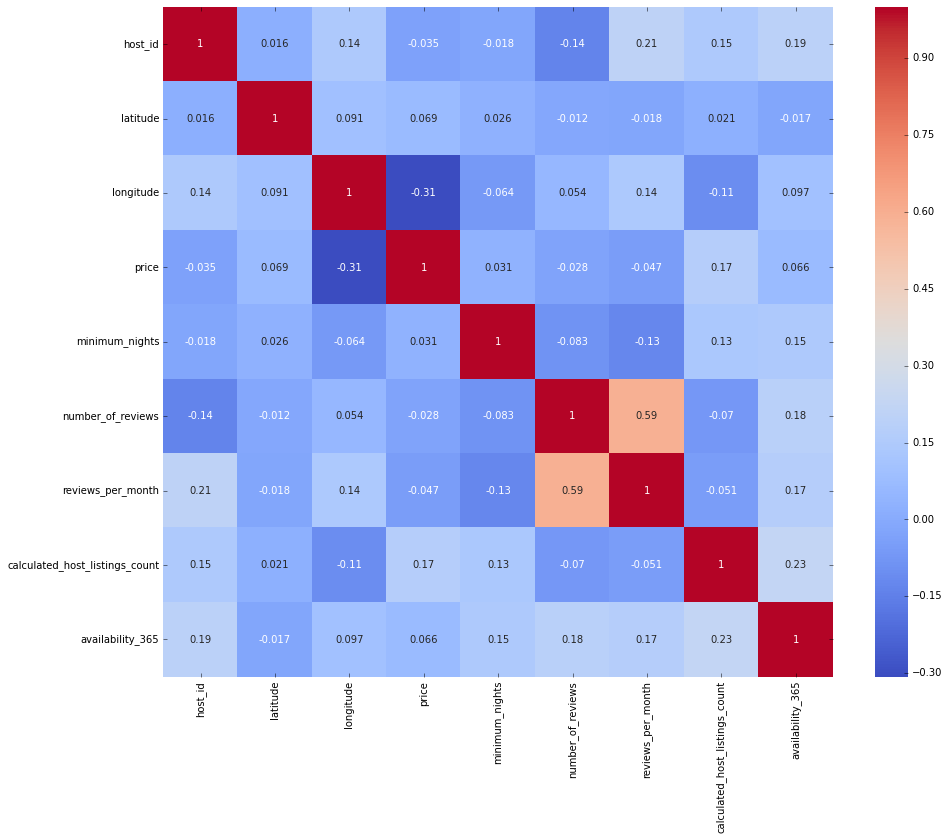

In [73]:
#Visualising the correlation values between all numerical variables
plt.figure(figsize=(15,12))
Variable_corr = df_no_outlier.corr()
sns.heatmap(Variable_corr ,cbar=True,annot=True, cmap="coolwarm")

We know that correlation value varies between -1 to 1 <br>
-1 to -0.5 is Negatively strong Correlation and -0.5 to 0 Negatively Weak Correlation <br>
0 to 0.5 is Positively strong Correlation and 0.5 to 1 Positively Weak Correlation <br>
**We can see from above correlation heatmap that reviews_per_month and number_of_reviews have strongly Positive correlation**


# **1.What can we learn about different hosts and areas?**

## **1.1 Top 10 most listed Hosts**

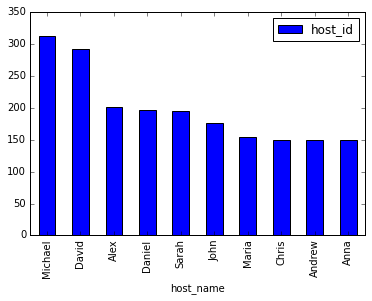

In [74]:
#Visualising Bargraph for top 10 listed hosts with their names using count of host id's. 
Host_id = df_no_outlier['host_id'].value_counts()[:10]

Most_listed_host = df_no_outlier[['host_name','host_id']].groupby('host_name').nunique('host_id').sort_values('host_id',ascending=False)
Most_listed_host[:10].plot(kind='bar')

Michael have the highest number of property listing compared to other hosts.

## **1.2 Proportion of Hosts listed in all neighbourhood group on the basis of Host_Id.** 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a718b96d0>],
      dtype=object)

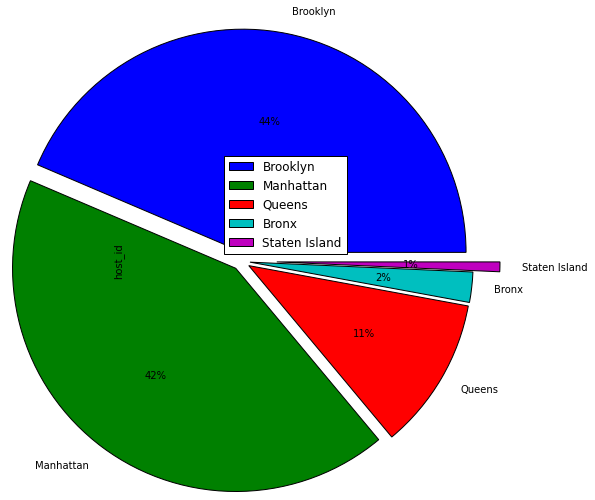

In [75]:
#creating the pie chart of Hosts listed in all neighbourhood group on the basis of Host_Id
colors = sns.color_palette('pastel')
Popular_host_areawise = df_no_outlier[['host_id','neighbourhood_group']].groupby(['neighbourhood_group']).nunique('host_id').sort_values('host_id',ascending=False)
Popular_host_areawise.plot(kind='pie',subplots=True,radius=2.5,autopct='%.0f%%',explode=[0.1,0.1,0.1,0.1,0.4])

There are 5 neighbourhood groups and we can see the proportion of hosts in every neighbourhood through above pie chart


We can see that 44% hosts are listed in Brooklyn followed by 42% in Manhattan and least in Staten Island with 1%

## **1.3 Count of room type on the basis of Neighbourhood group.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


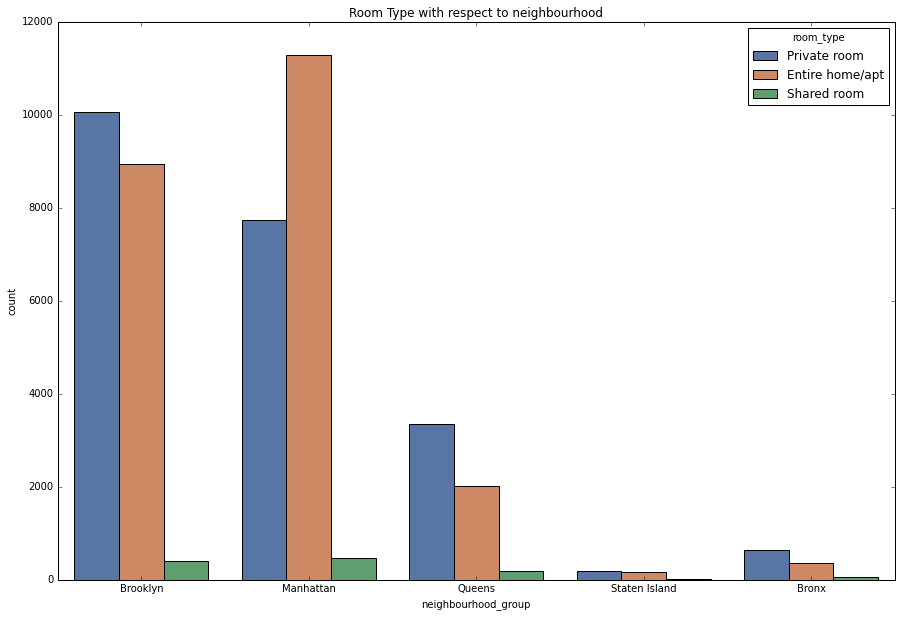

In [76]:
#Creating countplot for count of different room types with respect to Neighbourhood groups
plt.figure(figsize=(15,10))
plt.title("Room Type with respect to neighbourhood")
sns.countplot(df_no_outlier.neighbourhood_group,hue=df_no_outlier.room_type, palette="deep")
plt.show()

The graph shows that Private rooms are most listed in Brooklyn that is nearly 10000, Manhattan neighbourhood clearly dominates in listing of Entire Home type and listing of Shared rooms are very less compared to other room type but Manhattan and Brooklyn covers the most numbers around 500 and 400 respectively.

# **2. What can we learn from predictions? (ex: locations, prices, reviews, etc.)**

## **2.1 Which Neighbourhood group is the most costly?**

                          price
neighbourhood_group            
Bronx                 77.367633
Brooklyn             105.706276
Manhattan            145.903345
Queens                88.919317
Staten Island         89.235616


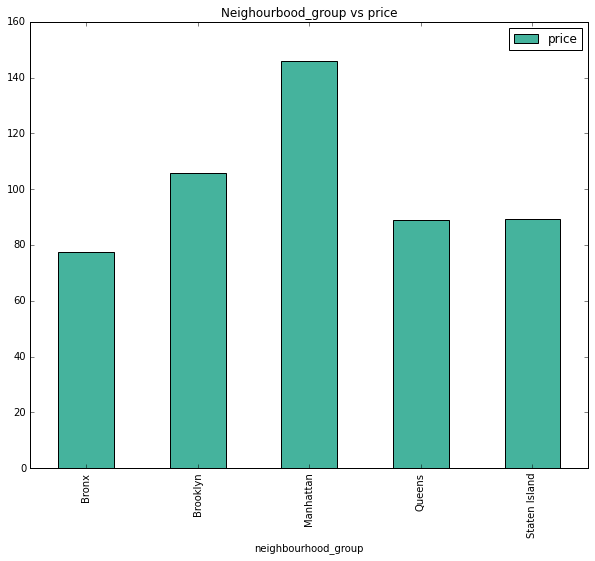

In [77]:
Costliest_neighbourhood = df_no_outlier[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()
#printing average price 
print(Costliest_neighbourhood) 

#Bargraph for Average price in all neighbourhood_group
Costliest_neighbourhood.plot(kind = 'bar', title = 'Neighourbood_group vs price',figsize=(10,8), color = '#45B39D')

From the above Bar graph we can see that Manhattan neighbourhood group has the highest average price.

# **2.2 Show the top 5 neighbourhoods that have the highest number of properties**

In [78]:
#creating a new variable to get top 5 neighbourhoods that highest number of properties
property_count_in_neighbourhoods = df_no_outlier.neighbourhood.value_counts().head(5)
property_count_in_neighbourhoods


Williamsburg          3731
Bedford-Stuyvesant    3638
Harlem                2583
Bushwick              2437
Upper West Side       1787
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Count of properties')

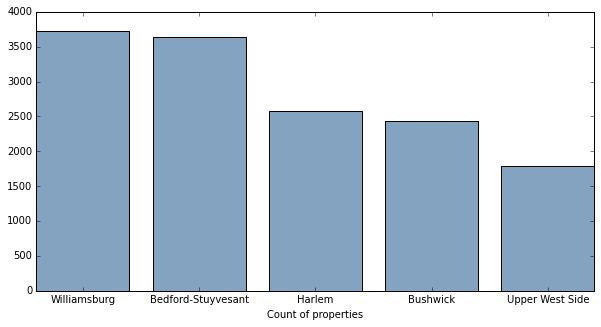

In [79]:
#creating x and y lists to store index as names of neighbourhood in variable x and count of corresponding neighbours in variable y
x = list(property_count_in_neighbourhoods.index)
y = list(property_count_in_neighbourhoods.values)
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("Count of properties")

We can clearly see that among top 5 neighbourhood that have highest number of properties, Williamsburg have the highest count and reason for this can be as Brooklyn have high number of properties and Williamsburg is a neighbourhood in Brooklyn

## **2.3 Neighbourhood group with the most no of reviews recorded.**

                     number_of_reviews
neighbourhood_group                   
Bronx                             1069
Brooklyn                         19406
Manhattan                        19492
Queens                            5565
Staten Island                      365


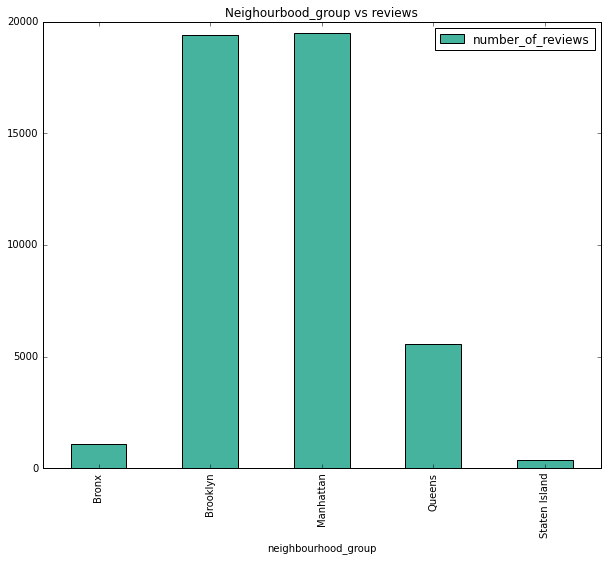

In [80]:
Most_reviewed_neighbours = df_no_outlier[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').count()
print(Most_reviewed_neighbours)
Most_reviewed_neighbours.plot(kind = 'bar', title = 'Neighourbood_group vs reviews',figsize=(10,8), color = '#45B39D')

Brooklyn and Manhattan have the most number of reviews and reason for this is both neighbourhood groups have high number of properties compared to others. 

# **3.How analysis of this data can help in listing new business and setting a price for future growth of a Property?**

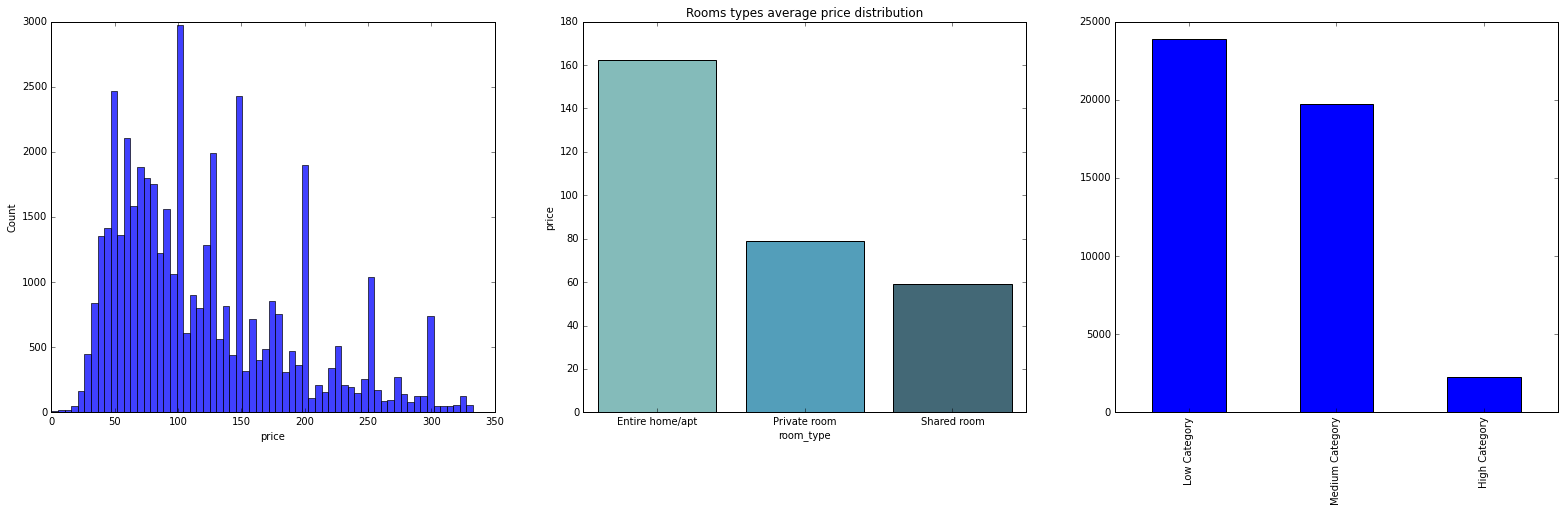

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 7))
ax = axes.flatten()
#creating histograph for price
sns.histplot(df_no_outlier.price,  ax=ax[0])

average_rate = df_no_outlier.groupby('room_type', as_index=False)[['price']].mean()
sns.barplot(data=average_rate, x='room_type', y='price', palette='GnBu_d', ax=ax[1]) # Visualising Rooms types with their average price distribution
ax[1].set_title("Rooms types average price distribution");

#Creating function for dividing the price in High, Medium and Low categories
def room(x):
    if x<=100:
        return 'Low Category'
    elif x >100 and x<=250:
        return 'Medium Category'
    else:
        return 'High Category'
a=df_no_outlier['price'].apply(room).value_counts().plot(kind='bar').ax=ax[2] ; 
a



The above graphs shows that price range from 50 to 150 have high number of counts and it is also verified through the function that Low category have higher number of price counts, also barplot shows the average price of different room categories. These results can be helpful for host to set the new price in between the range of 50 to 300 for preferrable room type to gain more profits.

# **4. Which hosts are the busiest and why?**

In [82]:
colors = sns.color_palette('pastel')
#Geting Busiest host based on no of reviews using sorting of host id and host names
top_hosts = df_no_outlier[['host_name','host_id','number_of_reviews']].groupby(['host_id','host_name']).sum().sort_values('number_of_reviews',ascending=False)
top_ten_hosts = top_hosts[:10]
#Printing Top 10 Hosts
top_ten_hosts


,,number_of_reviews
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
4734398,Jj,1798
16677326,Alex And Zeena,1355
6885157,Randy,1346
23591164,Angela,1269


Text(0, 0.5, 'Number of reviews')

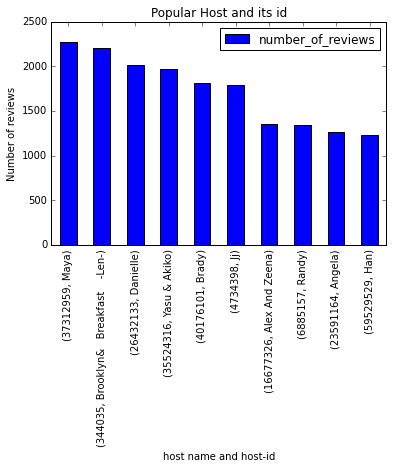

In [83]:
#Visualising above data through Bargraph using Number of reviews vs Top 10 host id along with their names
top_ten_hosts.plot(kind='bar')
plt.title("Popular Host and its id")
plt.xlabel("host name and host-id")
plt.ylabel("Number of reviews")


From the above Bar graph we can see the top 10 hosts with highest number of reviews it means that these hosts handled the most number of bookings and the reason of these hosts handle more bookings as they are listed in brooklyn and Manhattan that covers the most number of room_types

# **5. Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


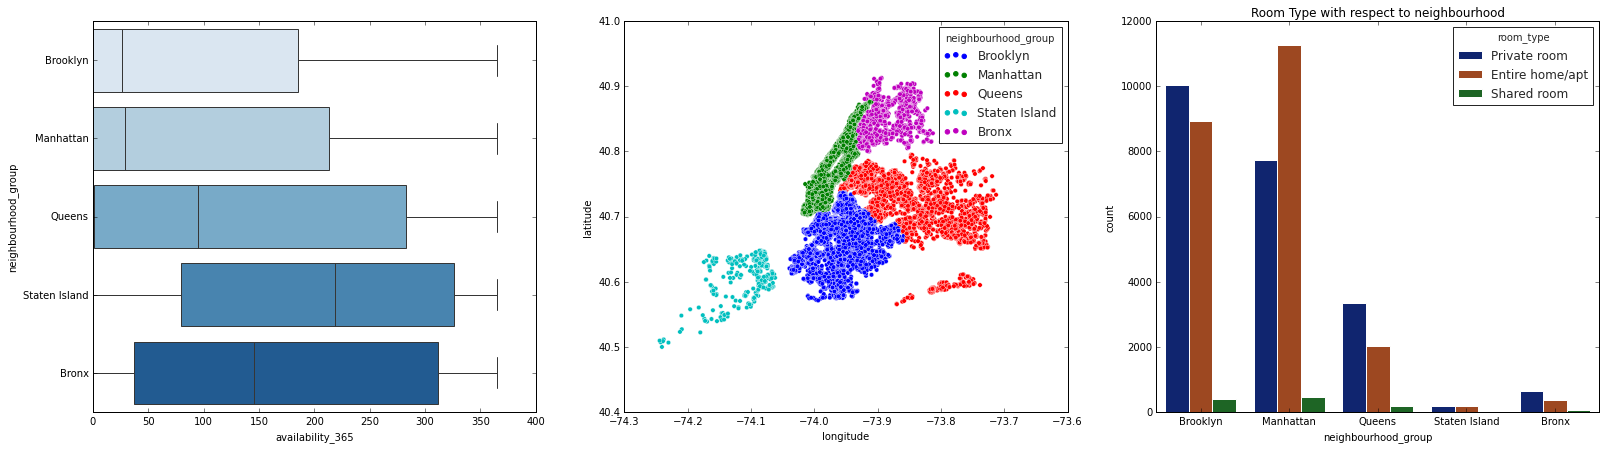

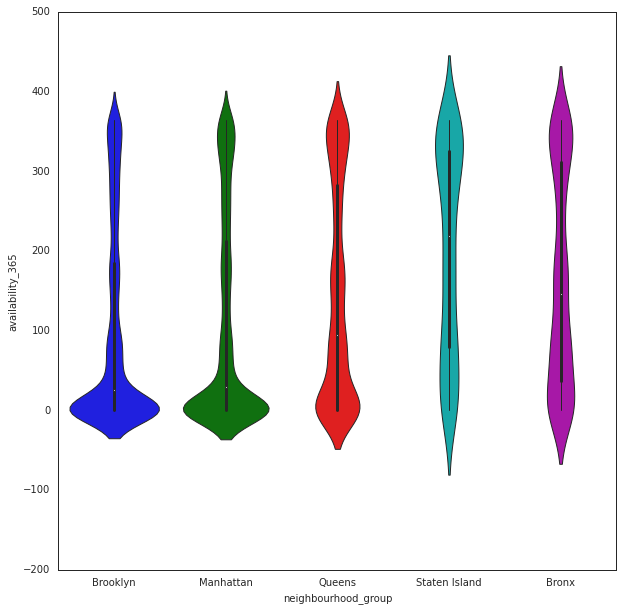

In [84]:
#Visualising availability of all neighbourhood group 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 7))
ax = axes.flatten()
#creating boxplot
sns.set_style(style='white')
sns.boxplot( y=df_no_outlier["neighbourhood_group"], x=df_no_outlier["availability_365"],palette="Blues", ax=ax[0]);
#creating scatterplot for neighbourhood_group
sns.scatterplot(df_no_outlier.longitude,df_no_outlier.latitude,hue=df_no_outlier.neighbourhood_group, ax=ax[1])

plt.title("Room Type with respect to neighbourhood")
sns.countplot(df_no_outlier.neighbourhood_group,hue=df_no_outlier.room_type, palette="dark",ax=ax[2])
plt.show()
#creating countplot for availability of property in different neighbourhoods
plt.figure(figsize=(10,10))
sns.violinplot(data=df_no_outlier, x="neighbourhood_group", y="availability_365")
plt.show()

From boxplot we can see that Staten Island have high average of availability in the range of 200 to 250 and both Manhattan and Brooklyn have less average (Violinplot shows the same data). <br>
(**Reason**) From Countplot we can see that Staten island only have private room and entire apartment and do not have Shared rooms, and people prefer mostly shared rooms as they are cheaper. Also, from Scatterplot we can clearly see that Staten_island covers very less number of Neighbourhood group means less population. <br>
Having less availaibity in Manhattan and Brooklyn is exact opposite from staten island, as these two neighbourhood groups are high populated.

# **6. Price band, Maximum and Minimum values of each Neighbourhood group.**

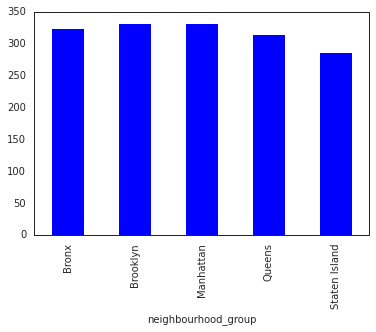

In [85]:
#Getting max price value of different neighbourhood groups
h = df_no_outlier.groupby(['neighbourhood_group'])['price']
max_value = h.max()
min_values = h.min()
price_band = h.max() - h.min()
price_band
#Visualising the values in bargraph
price_band.plot(kind='bar')


# **7. Price Distribution concerning neighbourhood group and why Manhattan have a high average price??**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


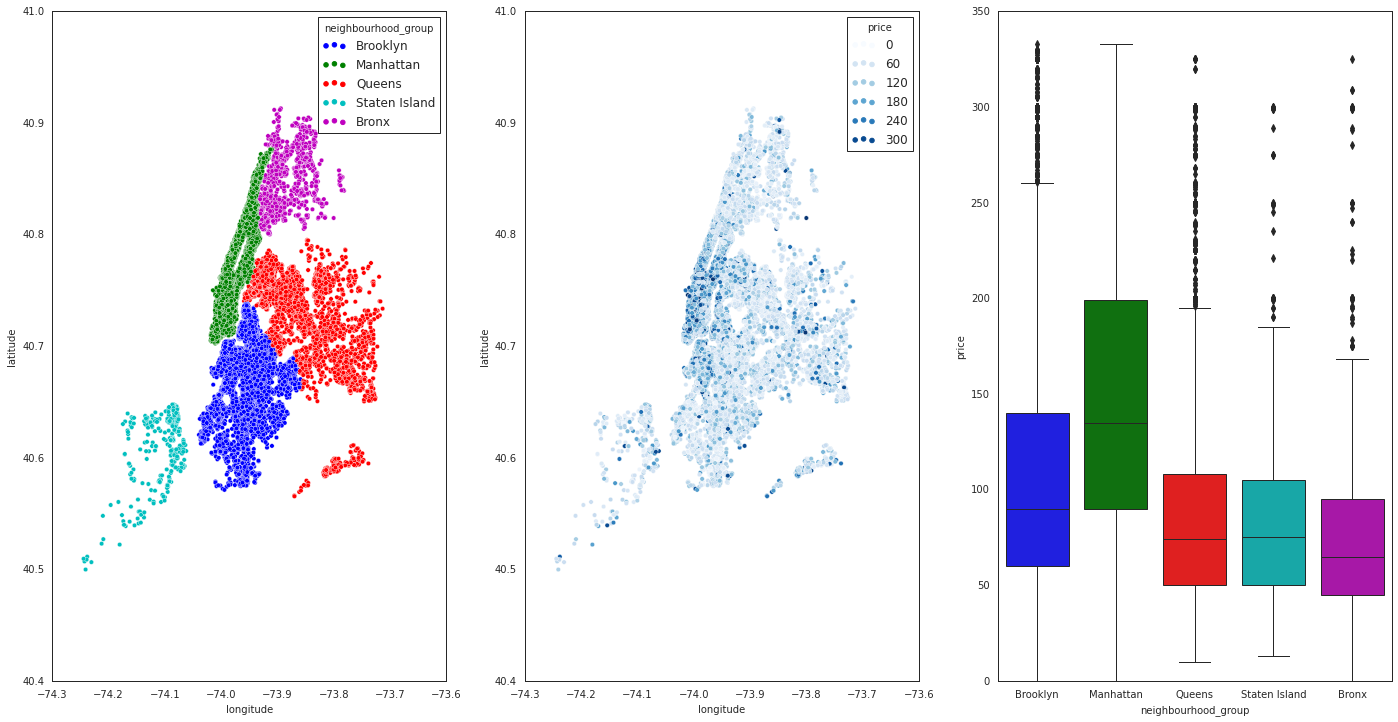

In [86]:
#setting rows and columns for multiple subplots adjustment
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12)) 
ax = axes.flatten()

# Scatterplot for Neighbourhood group 
sns.scatterplot(df_no_outlier.longitude,df_no_outlier.latitude,hue=df_no_outlier.neighbourhood_group, ax=ax[0]) 

#price distribution according to longitude and latitude
sns.scatterplot(df_no_outlier.longitude,df_no_outlier.latitude,hue=df_no_outlier.price, palette='Blues', ax=ax[1]) 
plt.ioff()

#Boxplot for getting avearge price in different neighbourhood groups 
plt.style.use('classic')
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df_no_outlier, ax=ax[2]) 




The first scatter plot is showing the neighbourhood groups using longitude and latitude and second scatter plot is showing the price distribution in all neighbourhood groups. We can see that Manhattan have high price range as Dark Blue dots are more in that region. The reason for having high price: Manhatan neighbourhood group covers the most number of Entire home or appartement type property which are the most expensive room type compared to Shared room and private rooms.

# **8. Which are the most popular and most occupied room type on basis of its availability?**

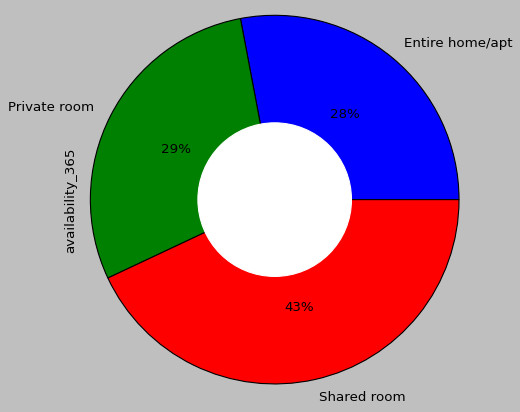

In [87]:
Popular_room = df_no_outlier.groupby(['room_type'])['availability_365'].mean()
Popular_room.plot(kind='pie',subplots=True,radius=1.2,autopct='%.0f%%')

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

From the above graph we can see that Shared rooms have 43% availablity of rooms in a year, private room and entire home have same approx percentage 29% and 28% respectively.

# **Conclusion**

1. Most hosts are listed in Brooklyn followed by Manhattan and least in Staten Island <br>
2. People prefer Private rooms mostly in Brooklyn and in the Manhattan neighbourhood people prefer the Entire Home type. <br>
3. Manhattan neighbourhood group has the highest average price because there is the most number of Entire home type properties. <br>
4. Brooklyn neighbourhood has a high number of properties and this is the reason for Williamsburg city having the highest count of properties because it falls in Brooklyn Neighbourhood <br>
5. Staten island has high prices and less number of properties because it only has a private room and entire apartment and does not have Shared rooms. <br>
6. Shared rooms have high availability compared to other rooms

